## OpenCV
# OpenCV 개요

### 참고 자료
- C:\khh\아이코어이앤씨\AI이노베이션스퀘어\_고급과정교재\_2020-04.pdf
- OpenCV 4로 배우는 컴퓨터 비전과 머신 러닝 (길벗)

### OpenCV 개념
- Open Source Computer Vision Library
- https://opencv.org
- 영상파일 입출력, 화질 향상, 객체 검출과 인식, 추적, 3차원 비전문제 해결 등
- 1999년 인텔에서 개발한 IPL을 기반으로 만들어지기 시작함
- 역사
> - OpenCV 1.0 : 2006년, C언어 기반
> - OpenCV 2.0 : 2009년, C++ 기반, Mat 클래스
> - OpenCV 3.0 : 2015년, dnn 지원
> - OpenCV 4.0 : 2018년, C++11 필수지원, dnn 강화

### 설치
- pip install opencv-python
- import cv2

In [1]:
import cv2
cv2.__version__

'4.1.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 이미지 읽어오기
- cv2.imread(filename, flags=cv2.IMREAD_COLOR)
- flags
> - cv2.IMREAD_COLOR(1) : 알파 채널을 제외하고 칼러 이미지를 읽어옴 (디폴트)
> - cv2.IMREAD_GRAYSCALE(0) : 그레이 이미지 읽어옴
> - cv2.IMREAD_UNCHANGED(-1) : 알파 채널을 포함해 읽어옴 (RGBA)
- 결과값은 numpy 어레이
> - shape : 높이X넓이X채널
> - 채널 순서 : BGR

In [4]:
bob = cv2.imread('bob.jpg')

In [5]:
type(bob)

numpy.ndarray

In [6]:
bob.shape, bob.dtype

((355, 355, 3), dtype('uint8'))

In [7]:
bob.max(), bob.min()

(255, 0)

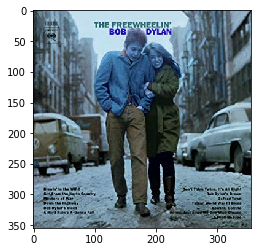

In [8]:
plt.imshow(bob)

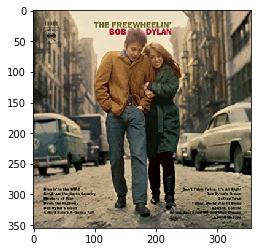

In [9]:
plt.imshow(bob[:,:,[2,1,0]]) # BGR 을 RGB 로 바꾸어 줌

- 그레이 이미지로 읽어오기

In [10]:
bob_gray = cv2.imread('bob.jpg', cv2.IMREAD_GRAYSCALE)

In [11]:
bob_gray.shape

(355, 355)

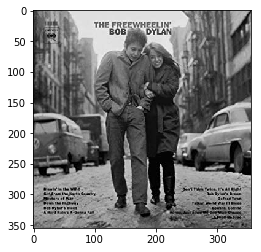

In [13]:
plt.imshow(bob_gray, cmap='gray')

### 이미지 출력
- OpenCV 출력은 윈도우 방식을 사용한다 (이벤트 드리븐, 비동기 방식)
- cv2.imshow()
- cv2.waitKey() : 지정한 밀리초만큼 키입력을 기다림 (0이면 무한대), 입력한 키값을 출력

In [19]:
cv2.imshow('my image', bob)

In [20]:
# waitKey() 를 호출해야 이미지가 출력된다
cv2.waitKey(0)

113

In [21]:
# 윈도우를 닫는다
#cv2.destroyAllWindows()
cv2.destroyWindow('my image')

- 여러 이미지 출력

In [24]:
cv2.imshow('my image', bob)
cv2.imshow('my image2', bob_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
cv2.imshow('my image', bob)
cv2.waitKey(0)
cv2.imshow('my image', bob_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 저장
- cv2.imwrite()

In [22]:
cv2.imwrite('test.jpg', bob)
! dir *.jpg

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 60DB-186A

 C:\khh\프로그래밍\OpenCV 디렉터리

2019-07-12  오후 03:12            28,366 bob.jpg
2020-06-17  오전 10:08            56,139 test.jpg
               2개 파일              84,505 바이트
               0개 디렉터리  21,375,451,136 바이트 남음


### 비디오 출력

In [3]:
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()